## Car Price Analysis Model

## 1. Overview of problem statement

Car price analysis by comparing and cosidering varioues features

## 2. Objective

To develop the best Car Price prediction model using machine learning techniques

## 3. Data description

Source: Morris Garage, California

#   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 17  fuelsystem        205 non-null    object 
 18  boreratio         205 non-null    float64
 19  stroke            205 non-null    float64
 20  compressionratio  205 non-null    float64
 21  horsepower        205 non-null    int64  
 22  peakrpm           205 non-null    int64  
 23  citympg           205 non-null    int64  
 24  highwaympg        205 non-null    int64  
 25  price             205 non-null    float64

## 4. Data collection

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

## 5. Data preprocessing and data cleaning

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

### 5.1 Outlier Detection using IQR method

VISUALIZE OUTLIERS OF PRICE COLUMN USING BOX PLOT

<Axes: ylabel='price'>

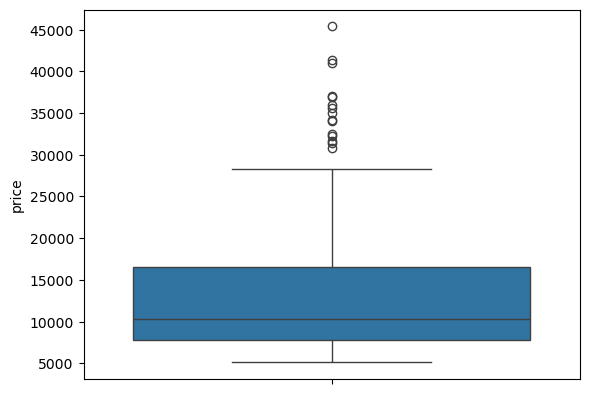

In [9]:
sns.boxplot(df['price'])

In [10]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
iqr = q3 - q1
print('q1 = ',q1)
print('q3 = ',q3)
print('iqr = ',iqr)

q1 =  7788.0
q3 =  16503.0
iqr =  8715.0


In [11]:
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
print('Lower_whisker =',lw)
print('Upper_whisker =',uw)

Lower_whisker = -5284.5
Upper_whisker = 29575.5


OUTLIERS

In [12]:
df[(df['price'] < lw) | (df['price'] > uw)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


CREATING A NEW DATAFRAME BY REMOVING THE OUTLIERS

Removing outliers on basis of price is not recommended, because various car models have different price range. 
So removing set of columns above a particular bound will affect the dataset. For 'practice purpose' the outliers
are removibg from this data using the IQR method.

In [13]:
df_rem_outliers = df[(df['price'] > lw) & (df['price'] < uw)]

In [14]:
df_rem_outliers.shape

(190, 26)

In [15]:
df.shape

(205, 26)

<Axes: ylabel='price'>

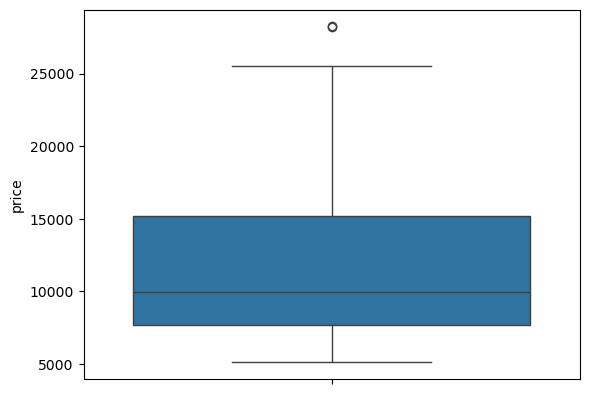

In [16]:
sns.boxplot(df_rem_outliers['price'])

SEPERATE NUMERICAL AND CATEGORICAL COLUMNS

In [17]:
df_cat = df_rem_outliers.select_dtypes(object)

In [18]:
df_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [19]:
df_num = df_rem_outliers.select_dtypes(['int64','int32','float64'])

In [20]:
df_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## 6. Exploratory data analysis

### 6.1. Distribution plots for features

car_ID


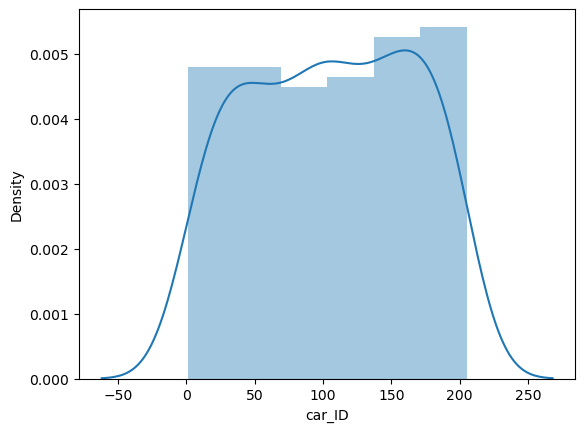

symboling


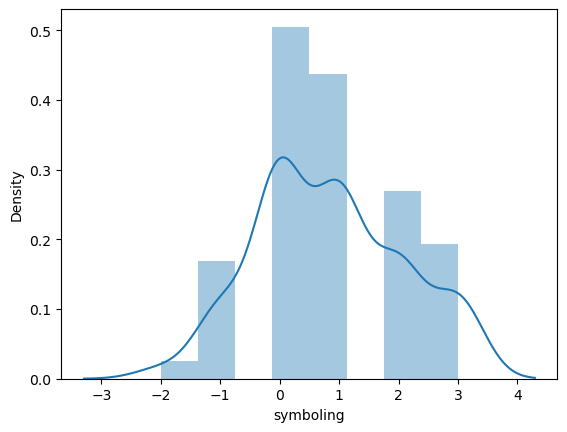

wheelbase


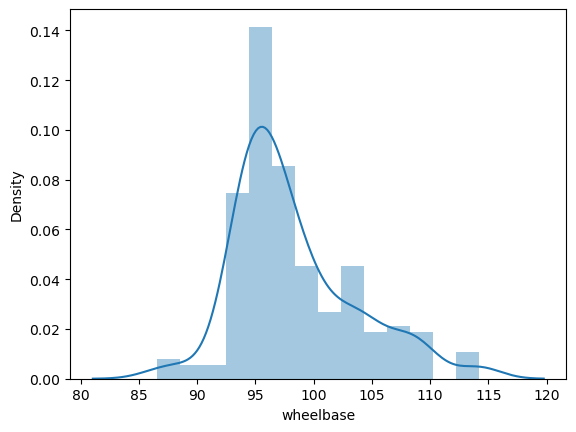

carlength


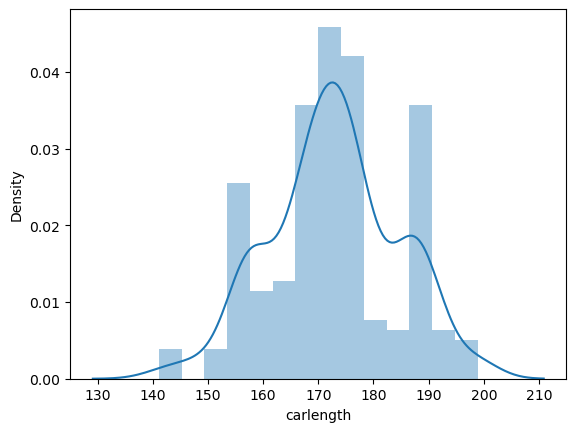

carwidth


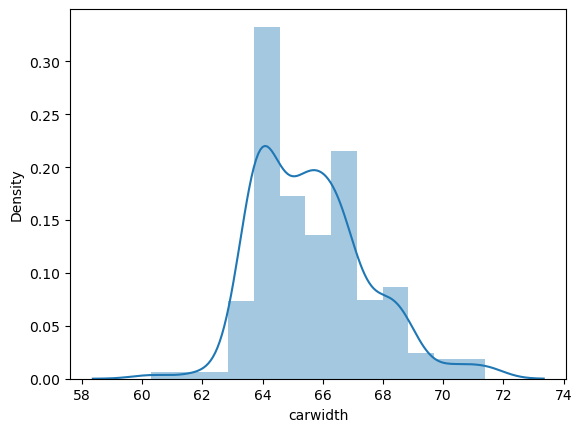

carheight


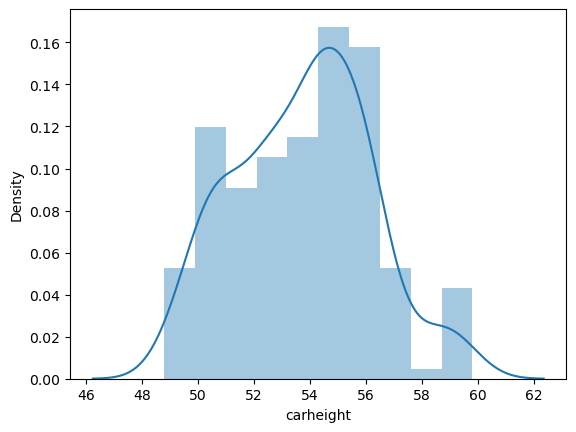

curbweight


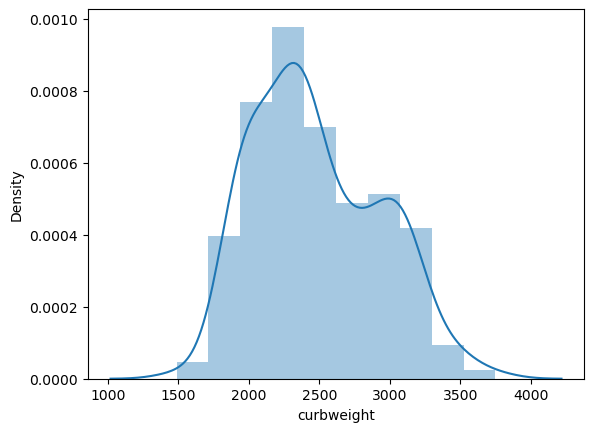

enginesize


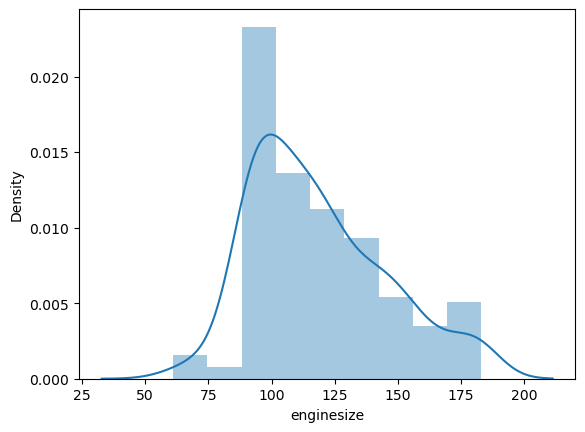

boreratio


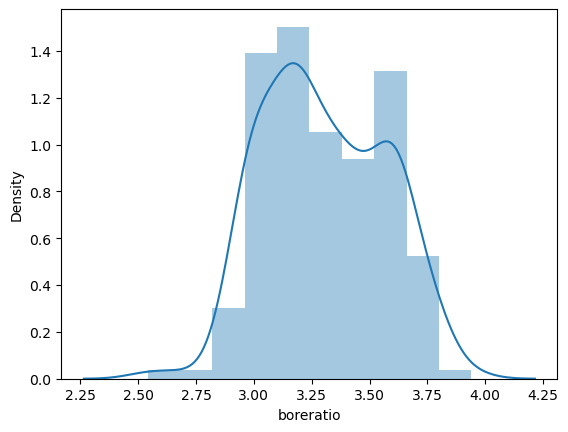

stroke


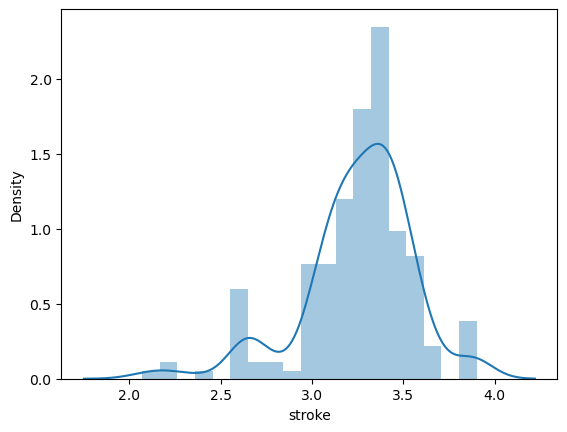

compressionratio


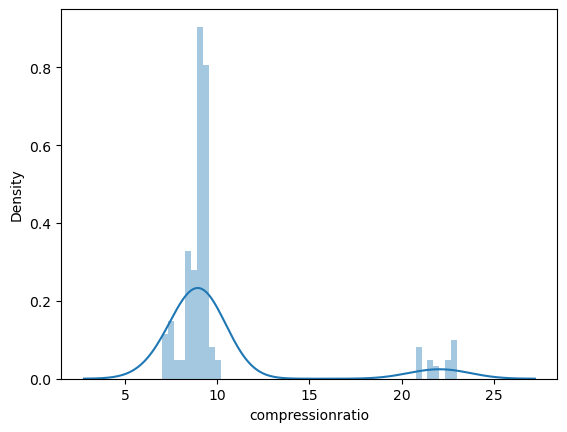

horsepower


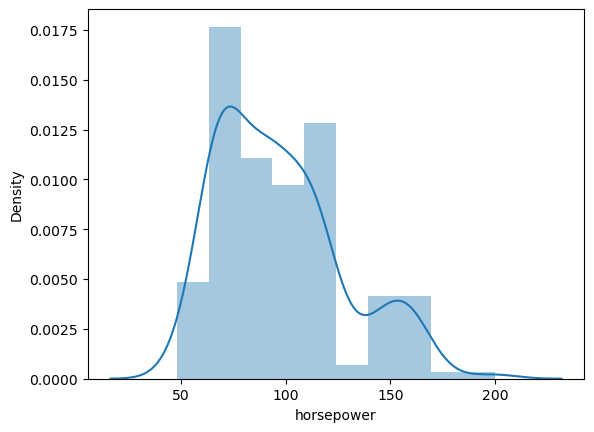

peakrpm


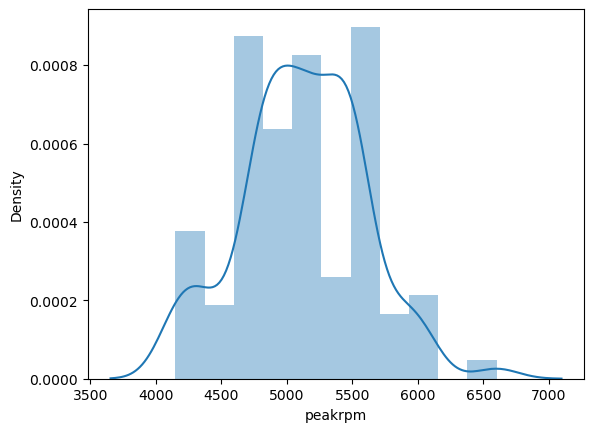

citympg


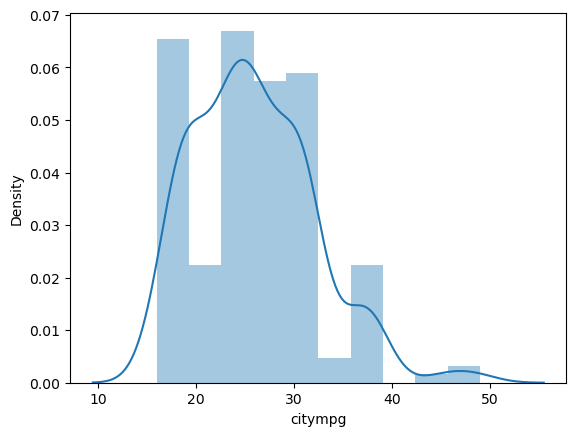

highwaympg


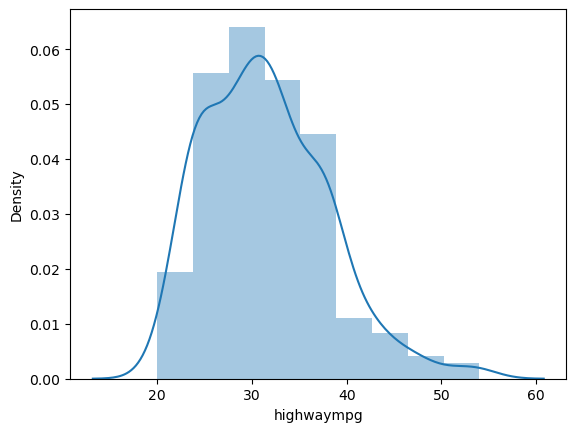

price


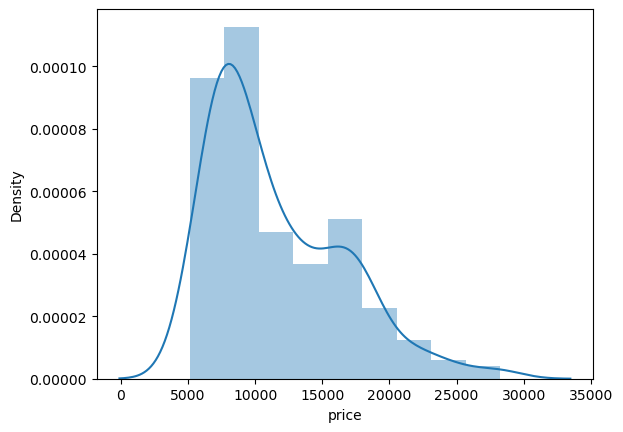

In [21]:
for col in df_num:
    print(col)

    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

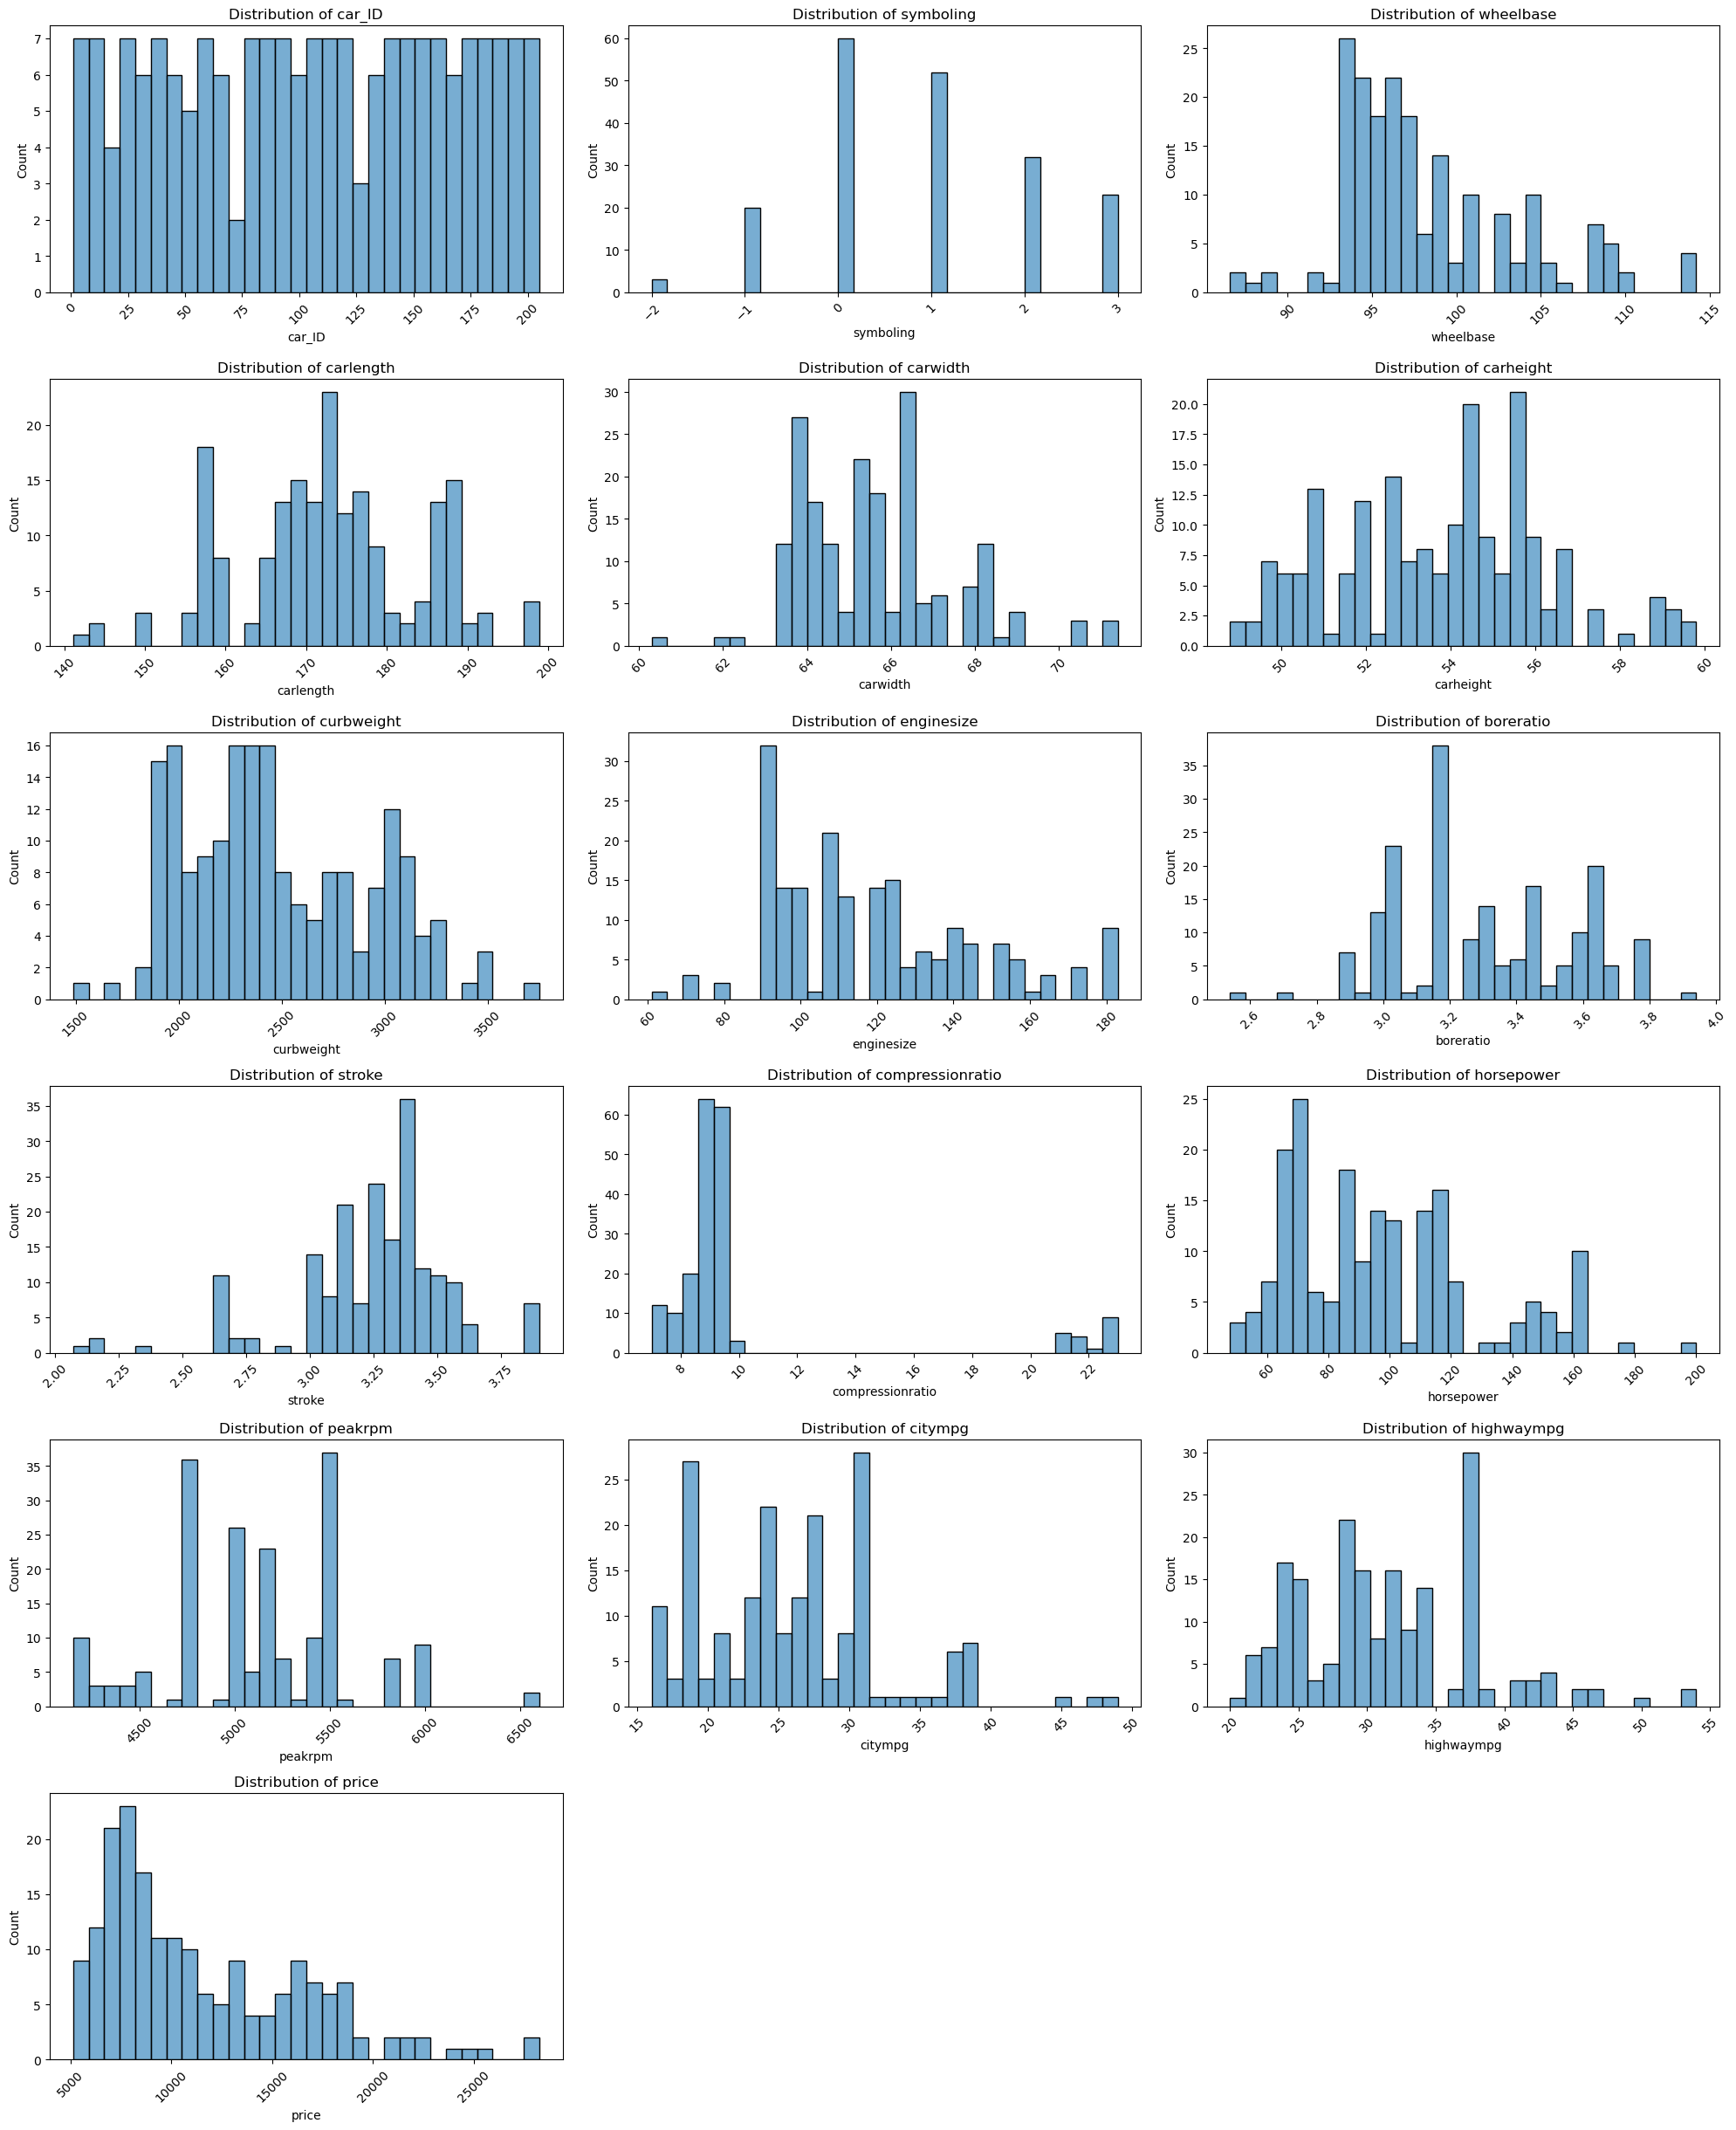

In [22]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=df_num, x=column, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.2. Box plots to visualize outliers

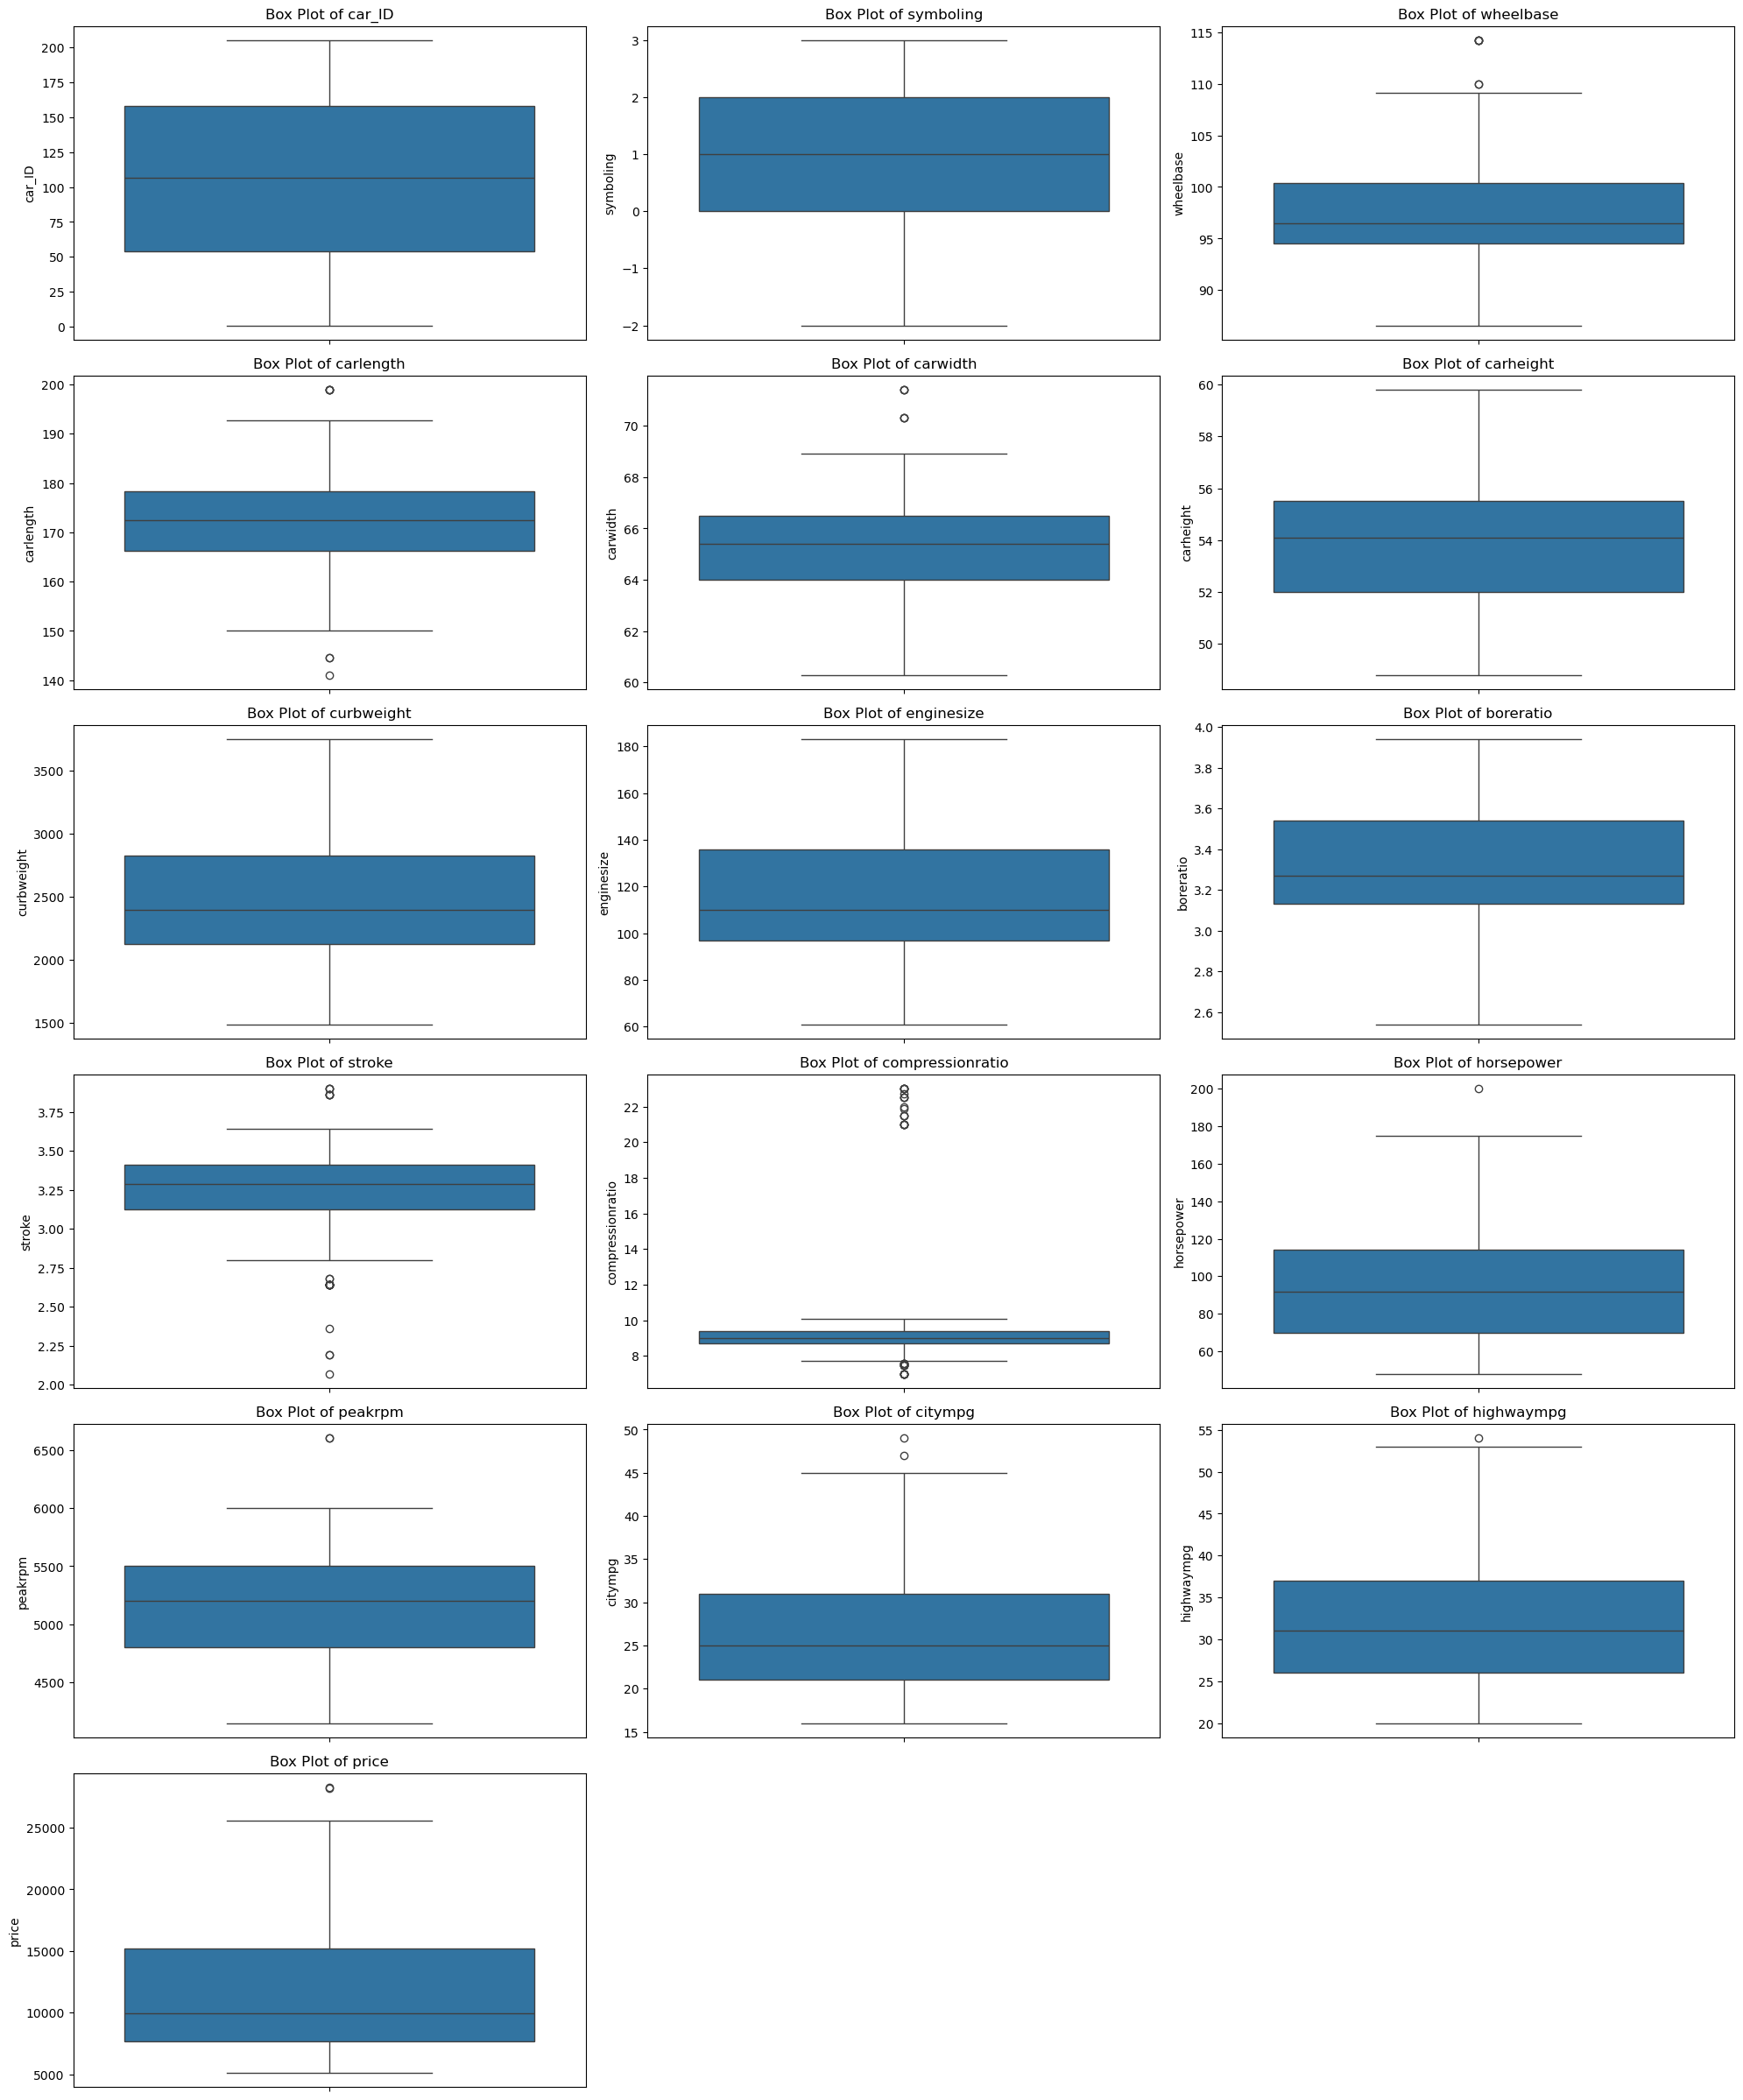

In [23]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(data=df_num, y=column)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.3. Violin plots for feature distributions by class

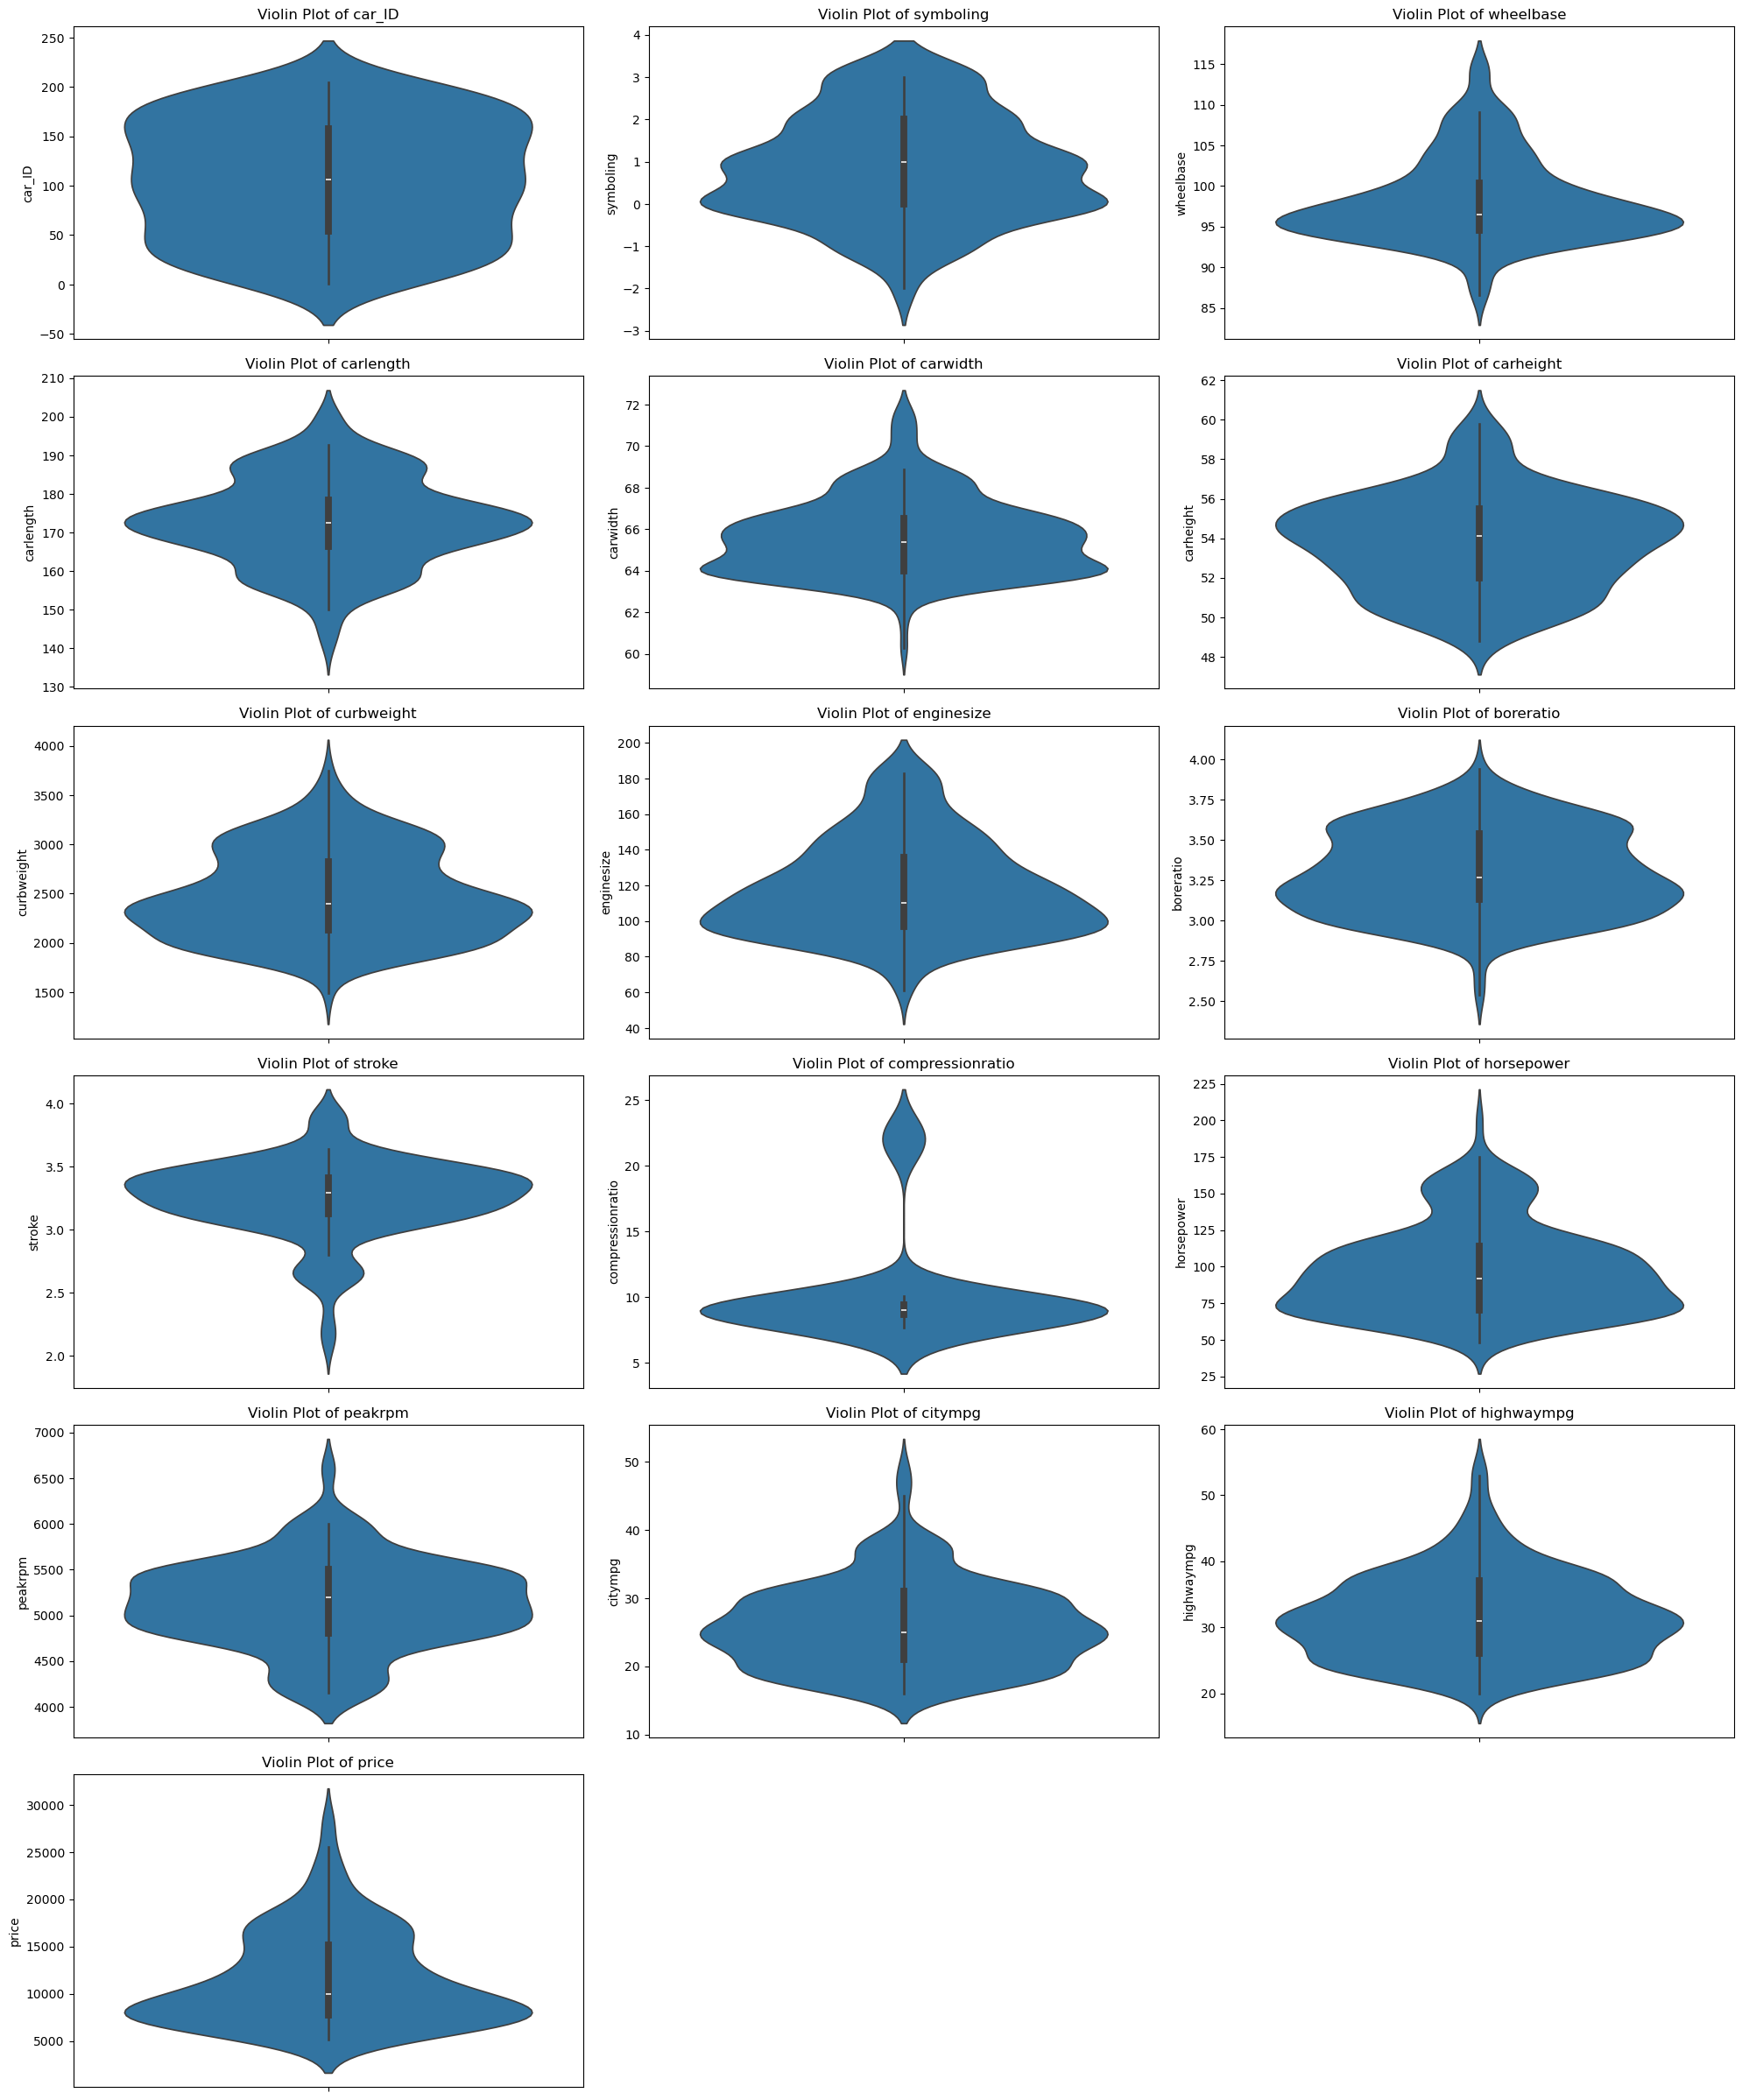

In [24]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(10, 3, i)
    sns.violinplot(data=pd.DataFrame(df_num[column]), y=column)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

### 6.4. CORRELATION

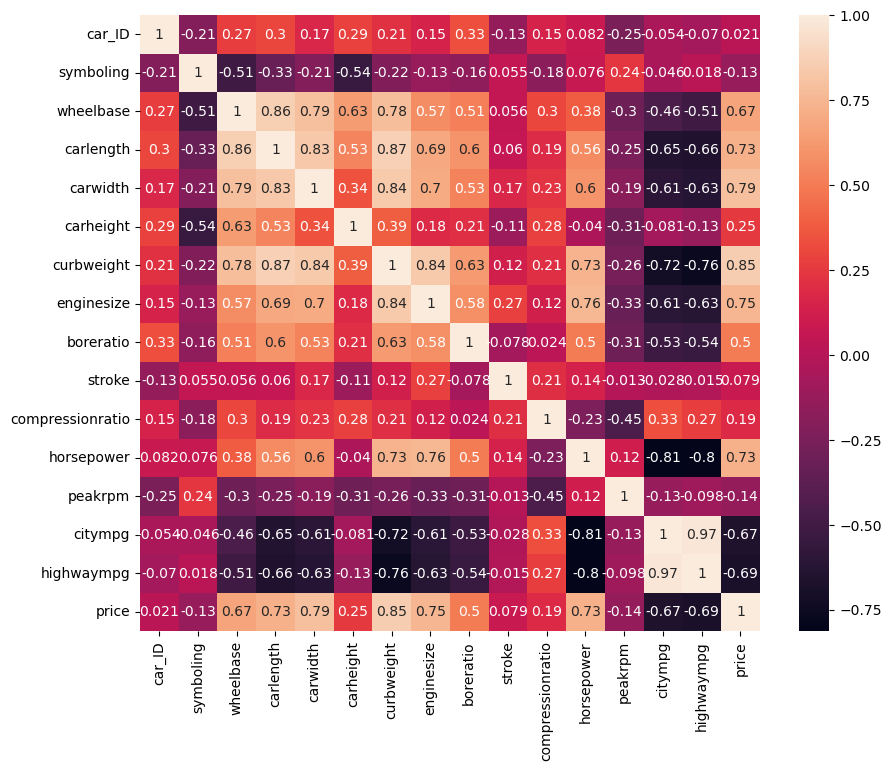

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(df_num.corr(),annot = True)
plt.show()

Here car_id, symboling, carheight, stroke, compressionratio, peakrpm, citympg,highwaympg columns have less correlation.
Where - ve correlation columns cannot be transformed to reduce skewness, as it may become null values.
So consider stroke and compressionration, can avoid car_id, not relevant.

## 7. Feature engineering

### 7.1 Data transformation - Encoding categorical values into numerical values using Label Encoding

Label Encoding

In [26]:
label_encoder = LabelEncoder()

In [27]:
for col in df_cat:
    label_encoder = LabelEncoder()
    df_cat[col] = label_encoder.fit_transform(df_cat[col])

In [28]:
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,1,5
1,3,1,0,1,0,2,0,0,1,5
2,1,1,0,1,2,2,0,4,2,5
3,4,1,0,0,3,1,0,2,1,5
4,5,1,0,0,3,0,0,2,0,5


In [29]:
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## 8. Feature selection

### 8.1. Using SelectkBest

Concat categorical and numerical columns

In [30]:
df_data = pd.concat([df_cat, df_num],axis = 1)

In [31]:
df_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,1,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,1,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,4,2,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,2,1,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,2,0,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,126,1,0,0,3,2,0,2,1,5,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,125,1,1,0,3,2,0,2,1,5,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,127,1,0,0,3,2,0,4,2,5,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,129,0,1,0,3,2,0,2,2,3,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Select X(features) and y(target) from the dataset(df_data) using SelectKBest

In [32]:
y = df_data['price']
X = df_data.drop('price', axis = 1)

In [33]:
X.shape

(190, 25)

In [34]:
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X,y)
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

In [35]:
selected_features

['aspiration',
 'carbody',
 'drivewheel',
 'cylindernumber',
 'fuelsystem',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## 9. Split data into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## 10. Feature scaling

### 10.1. Scaling using Standard Scaler

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 11. Build the ML model

1) Linear Regression
2) Decision Tree Regression
3) Random Forest Regression
4) Gradient Boosting Regression
5) Support Vector Regression

### 11.1. Linear Regression

In [101]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [106]:
lr_ypred = lr_model.predict(X_test_scaled)

### 11.2. Decision Tree Regression

In [102]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [107]:
dt_ypred = dt_model.predict(X_test_scaled)

### 11.3. Random Forest Regression

In [103]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [108]:
rf_ypred = rf_model.predict(X_test_scaled)

### 11.4. Gradient Boosting Regression

In [104]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [109]:
gb_ypred = gb_model.predict(X_test_scaled)

### 11.5. Support Vector Regression

In [46]:
sv_model = SVR()

In [105]:
sv_model.fit(X_train_scaled, y_train)

SVR()

In [110]:
sv_ypred = sv_model.predict(X_test_scaled)

## 12. Model Evaluation

### 12.1. Regression Metrics

In [111]:
print("\nLinear Regression Metrics:")
mae=mean_absolute_error(y_test, lr_ypred)
l_mse=mean_squared_error(y_test, lr_ypred)
rmse= l_mse ** 0.5
r2=r2_score(y_test, lr_ypred)
print("mae:",mae)
print("mse:",l_mse)
print("rmse:",rmse)
print("r2:", r2)


Linear Regression Metrics:
mae: 2659.175639987657
mse: 9222414.40652058
rmse: 3036.8428353341865
r2: 0.45135816655593963


In [112]:
print("\nDecision Tree Regression Metrics:")
mae=mean_absolute_error(y_test, dt_ypred)
d_mse=mean_squared_error(y_test, dt_ypred)
rmse= d_mse ** 0.5
r2=r2_score(y_test, dt_ypred)
print("mae:",mae)
print("mse:",d_mse)
print("rmse:",rmse)
print("r2:", r2)


Decision Tree Regression Metrics:
mae: 2323.061394736842
mse: 10717101.688260237
rmse: 3273.698472410102
r2: 0.3624391552719357


In [113]:
print("\nRandom Forest Regression Metrics:")
mae=mean_absolute_error(y_test, rf_ypred)
r_mse=mean_squared_error(y_test, rf_ypred)
rmse= r_mse ** 0.5
r2=r2_score(y_test, rf_ypred)
print("mae:",mae)
print("mse:",r_mse)
print("rmse:",rmse)
print("r2:", r2)


Random Forest Regression Metrics:
mae: 2237.083850877193
mse: 7135561.567143321
rmse: 2671.2471931933446
r2: 0.5755051325732521


In [114]:
print("\nGradient Boosting Regression Metrics:")
mae=mean_absolute_error(y_test, gb_ypred)
g_mse=mean_squared_error(y_test, gb_ypred)
rmse= g_mse ** 0.5
r2=r2_score(y_test, gb_ypred)
print("mae:",mae)
print("mse:",g_mse)
print("rmse:",rmse)
print("r2:", r2)


Gradient Boosting Regression Metrics:
mae: 2507.5366689508655
mse: 8769413.617951656
rmse: 2961.3195737629626
r2: 0.47830720313537767


In [115]:
print("\nSupport Vector Regression Metrics:")
mae=mean_absolute_error(y_test, sv_ypred)
s_mse=mean_squared_error(y_test, sv_ypred)
rmse= s_mse ** 0.5
r2=r2_score(y_test, sv_ypred)
print("mae:",mae)
print("mse:",s_mse)
print("rmse:",rmse)
print("r2:", r2)


Support Vector Regression Metrics:
mae: 3660.280505517494
mse: 17121871.59601924
rmse: 4137.858334455064
r2: -0.018580884610003512


### 12.2. Model Comparison

In [116]:
models_comparison = pd.DataFrame({
    'Linear Regression': {
        "mae": mean_absolute_error(y_test, lr_ypred),
        "mse": mean_squared_error(y_test, lr_ypred),
        "rmse": (l_mse ** 0.5),
        "r2": r2_score(y_test, lr_ypred)
    },

    'Decision Tree Regression': {
        "mae": mean_absolute_error(y_test, dt_ypred),
        "mse": mean_squared_error(y_test, dt_ypred),
        "rmse": (d_mse ** 0.5),
        "r2": r2_score(y_test, dt_ypred)
    },

    'Random Forest Regression': {
        "mae": mean_absolute_error(y_test, rf_ypred),
        "mse": mean_squared_error(y_test, rf_ypred),
        "rmse": (r_mse ** 0.5),
        "r2": r2_score(y_test, rf_ypred)
    },

    'Gradient Boosting Regression': {
        "mae": mean_absolute_error(y_test, gb_ypred),
        "mse": mean_squared_error(y_test, gb_ypred),
        "rmse": (g_mse ** 0.5),
        "r2": r2_score(y_test, gb_ypred)
    },

    'Support Vector Regression': {
        "mae": mean_absolute_error(y_test, sv_ypred),
        "mse": mean_squared_error(y_test, sv_ypred),
        "rmse": (s_mse ** 0.5),
        "r2": r2_score(y_test, sv_ypred)
    }
})
print(models_comparison)

      Linear Regression  Decision Tree Regression  Random Forest Regression  \
mae        2.659176e+03              2.323061e+03              2.237084e+03   
mse        9.222414e+06              1.071710e+07              7.135562e+06   
rmse       3.036843e+03              3.273698e+03              2.671247e+03   
r2         4.513582e-01              3.624392e-01              5.755051e-01   

      Gradient Boosting Regression  Support Vector Regression  
mae                   2.507537e+03               3.660281e+03  
mse                   8.769414e+06               1.712187e+07  
rmse                  2.961320e+03               4.137858e+03  
r2                    4.783072e-01              -1.858088e-02  


## 13. Hyperparameter Tuning

Here we are taking Decision Tree Regression as our model

Define model and parameter grid

In [125]:
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

Perform grid search

In [136]:
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_grid = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


## 14. Save the model

In [137]:
joblib.dump(lr_model, 'ML_Regression_Car_Price_Analysis_Model.joblib')

['ML_Regression_Car_Price_Analysis_Model.joblib']

## 15. Test with Unseen Data

In [138]:
final_predictions = best_grid.predict(X_test_scaled)

In [147]:
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}

Check final model performance

In [148]:
for metric_name, value in final_metrics.items():
    print(f"{metric_name}:{value: .4f}")

MAE: 2842.7412
MSE: 12815221.7286
RMSE: 3579.8354
R2: 0.2376
